In [1]:
#import the necessary library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data csv file 
df=pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
#Check null values 
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
#apply lebealenco
#apply the LabelEncoder in weather  column because the  weather column is  label data  
#and label data is not understood computer
from sklearn.preprocessing import LabelEncoder
df["weather"]=LabelEncoder().fit_transform(df["weather"])
df.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [6]:
df["weather"].value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

In [7]:
# Find the correlation (relationship) between each column in the data
df.corr()

,precipitation,temp_max,temp_min,wind,weather
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,-0.267388,0.322337,0.154981,-0.065858,1.000000


<AxesSubplot:>

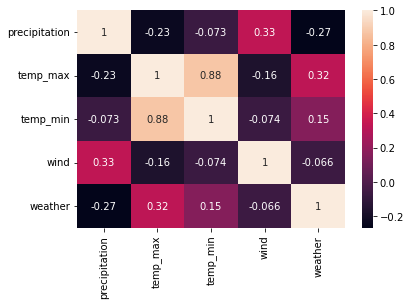

In [8]:
sns.heatmap(data=df.corr(),annot=True)

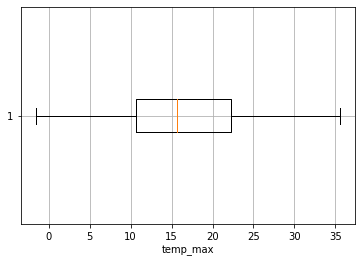

In [9]:
#find the outlier in dataset

plt.boxplot(df['temp_max'],vert=False)
plt.xlabel('temp_max')
plt.grid()

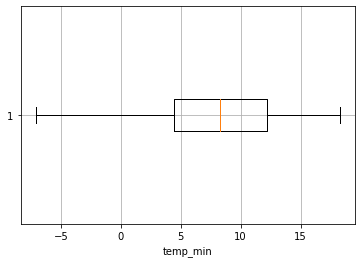

In [10]:
plt.boxplot(df['temp_min'],vert=False)
plt.xlabel('temp_min')
plt.grid()


In [11]:
a=df["weather"]
b=df["temp_min"]
c=df["temp_max"]
d=df["date"]


Text(0.5, 0, 'date')

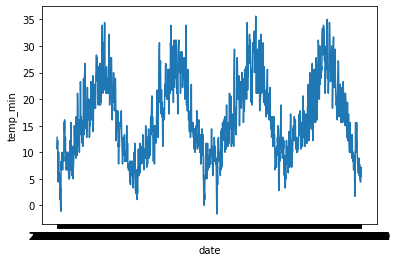

In [12]:
# show the tempratur with date 
plt.plot(d,c)
plt.ylabel("temp_min")
plt.xlabel("date")

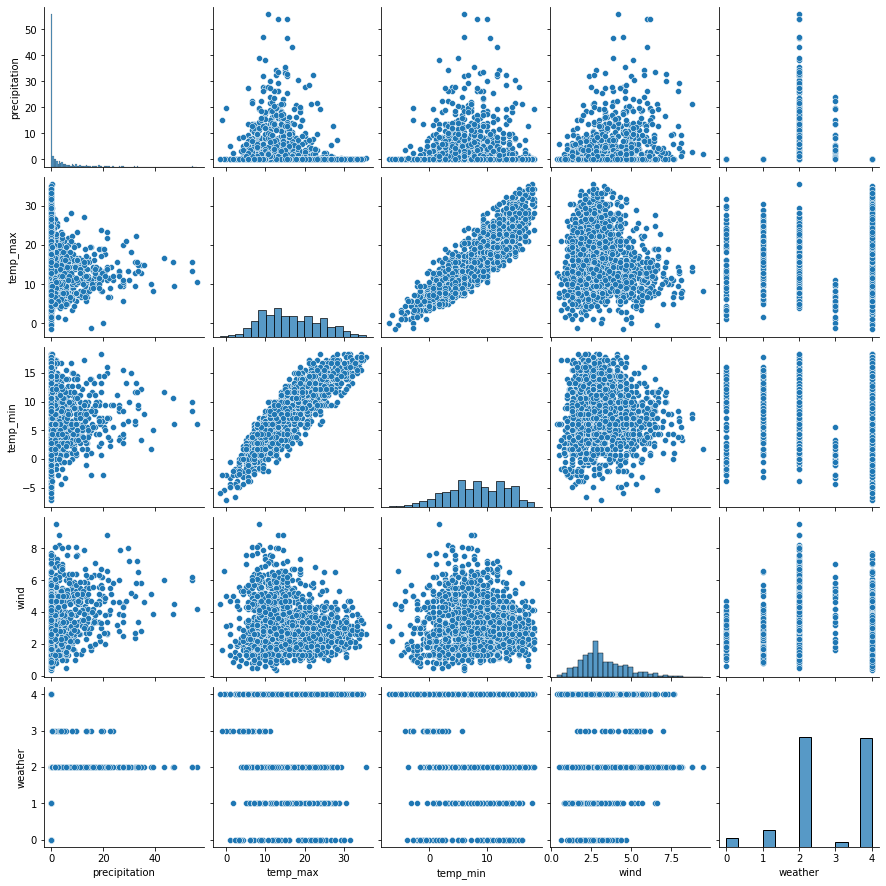

In [13]:
sns.pairplot(df)

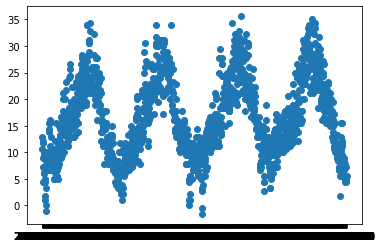

In [14]:
plt.plot(d,c,'o')

Text(0.5, 0, 'date')

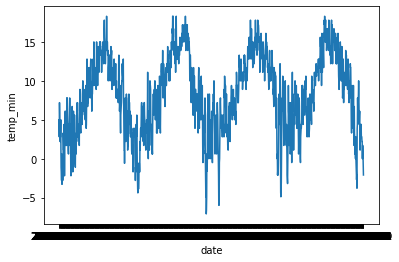

In [15]:
#show the temprachar
plt.plot(d,b)
plt.ylabel("temp_min")
plt.xlabel("date")


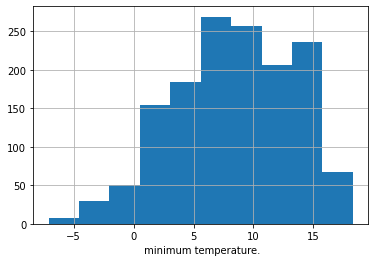

In [16]:
#using histogram show the minimum tempratur in teh data set
plt.hist(df["temp_min"])
plt.xlabel(' minimum temperature.')
plt.grid()

Text(0.5, 0, ' maximum temperature')

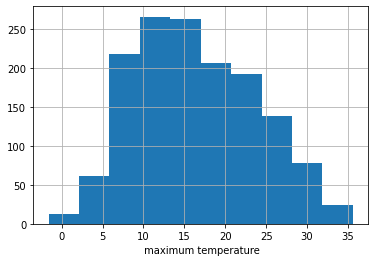

In [17]:
plt.hist(df["temp_max"])
plt.grid()
plt.xlabel(' maximum temperature')

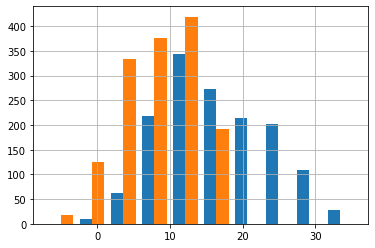

In [18]:
#histogram show the temp_min,temp_max 
plt.hist([df["temp_max"],df["temp_min"],])
plt.grid()

In [44]:
#split the data in (x and y) format. x is independent variable and y is dependent variable (target variable)
from sklearn.model_selection import train_test_split
x=df.iloc[:,1:3]
x
y=df.iloc[:,-1:]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

# model bulding

In [45]:
#model bulding
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)



from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(xtrain,ytrain)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
ypred= lg.predict(xtest)

In [47]:
models=[] # [("logreg", LogisticRegression), ("dt", DecisionTreeClassifier)]
accuracy=[]

models.append(("logreg", LogisticRegression()))
models.append(("dt", DecisionTreeClassifier()))

for name, model in models:
    model.fit(xtrain, ytrain)
    ypred=model.predict(xtest)
    accuracy.append(accuracy_score(ytest, ypred))

In [48]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain, ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest, ypred))
a=accuracy
np.mean(a)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        12
           2       0.96      0.94      0.95       133
           3       1.00      0.38      0.55         8
           4       0.81      1.00      0.90       130

    accuracy                           0.88       293
   macro avg       0.55      0.46      0.48       293
weighted avg       0.82      0.88      0.84       293



0.8686006825938566